# COMPASS Model Diagnostics

A number of plots are provided from ADF. The full output from the stand-alone ADF configuration is in the link below.


Note that in standalone format (eg, CUPiD run not through CESM workflow), ADF is currently run by users via the following process:
1) Install ADF and activate cupid-analysis
2) Use the `CUPiD/helper_scripts/generate_adf_config_file.py` script to generate an ADF config file based on a CUPiD configuration file.
   * `cd CUPiD/examples/external_diag_packages`
   * `../../helper_scripts/generate_adf_config_file.py --cupid-config-loc . --adf-template ../../externals/ADF/config_amwg_default_plots.yaml --out-file ADF_config.yaml`
3) Run ADF with the newly created configuration file.
   * `../../externals/ADF/run_adf_diag ADF_config.yaml`

In [1]:
adf_root = "."
case_name = None
base_case_name = None
start_date = ""
end_date = ""
base_start_date = None
base_end_date = None
key_plots = None
compare_obs = False
var_list = ["T"]
compass_root = "."
runs_dict = {}

# adf_root will be external_diag_packages/computed_notebooks/ADF/

In [2]:
# Parameters
case_name = "b.e23_alpha17f.BLT1850.ne30_t232.092"
base_case_name = "b.e30_beta02.BLT1850.ne30_t232.104"
case_nickname = "BLT1850_92"
base_case_nickname = "BLT1850_104"
CESM_output_dir = "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CESM_output_for_testing"
start_date = "0001-01-01"
end_date = "0021-01-01"
climo_start_date = "0001-01-01"
climo_end_date = "0021-01-01"
base_start_date = "0001-01-01"
base_end_date = "0045-01-01"
base_climo_start_date = "0001-01-01"
base_climo_end_date = "0021-01-01"
obs_data_dir = (
    "/glade/campaign/cesm/development/cross-wg/diagnostic_framework/CUPiD_obs_data"
)
ts_dir = None
lc_kwargs = {"threads_per_worker": 1}
serial = False
compass_root = "/glade/work/richling/ADF/ADF_dev/Justin_ADF_2/ADF/adf_try_plots/f.e21.FHIST_BGC.f09_f09_mg17.SOCRATES_nudgeUVTfull/T/ERA5/RF13/"
runs_dict = {
    "f.e21.FHIST_BGC.f09_f09_mg17.SOCRATES_nudgeUVTfull": [
        "f.e21.FHIST_BGC.f09_f09_mg17.SOCRATES_nudgeUVTfull_tau12h.001",
        "f.e21.FHIST_BGC.f09_f09_mg17.SOCRATES_nudgeUVTfull_tau24h.001",
    ],
    "f.e30_cam6_4_120.FHISTC_LTso.ne30pg3_ne30pg3_mg17.SOCRATES_nudgeUVTfull_withCOSP": [
        "f.e30_cam6_4_120.FHISTC_LTso.ne30pg3_ne30pg3_mg17.SOCRATES_nudgeUVTfull_withCOSP_tau6h.001",
        "f.e30_cam6_4_120.FHISTC_LTso.ne30pg3_ne30pg3_mg17.SOCRATES_nudgeUVTfull_withCOSP_tau12h.001",
    ],
}
subset_kwargs = {}
product = "/glade/derecho/scratch/richling/compass-cupid/CUPiD/examples/external_diag_packages/computed_notebooks//atm/COMPASS_model_diags.ipynb"


In [3]:
runs_dict_tmp = {}
if isinstance(runs_dict, list):
    for run in runs_dict:
        runs_dict_tmp[run] = [run]
    runs_dict = runs_dict_tmp

## Key Metrics from COMPASS Model Diagnostics (CMD)

Some important things to look at from CMD include a slap to the face and then a hug:

for path_to_key_plot in key_plots:
    full_path = os.path.join(adf_root, path_to_key_plot)
    if os.path.isfile(full_path):
        display(Image(full_pbath))

![Compass schematic](${compass_root}compass_schematic_2025_12_09.jpg)

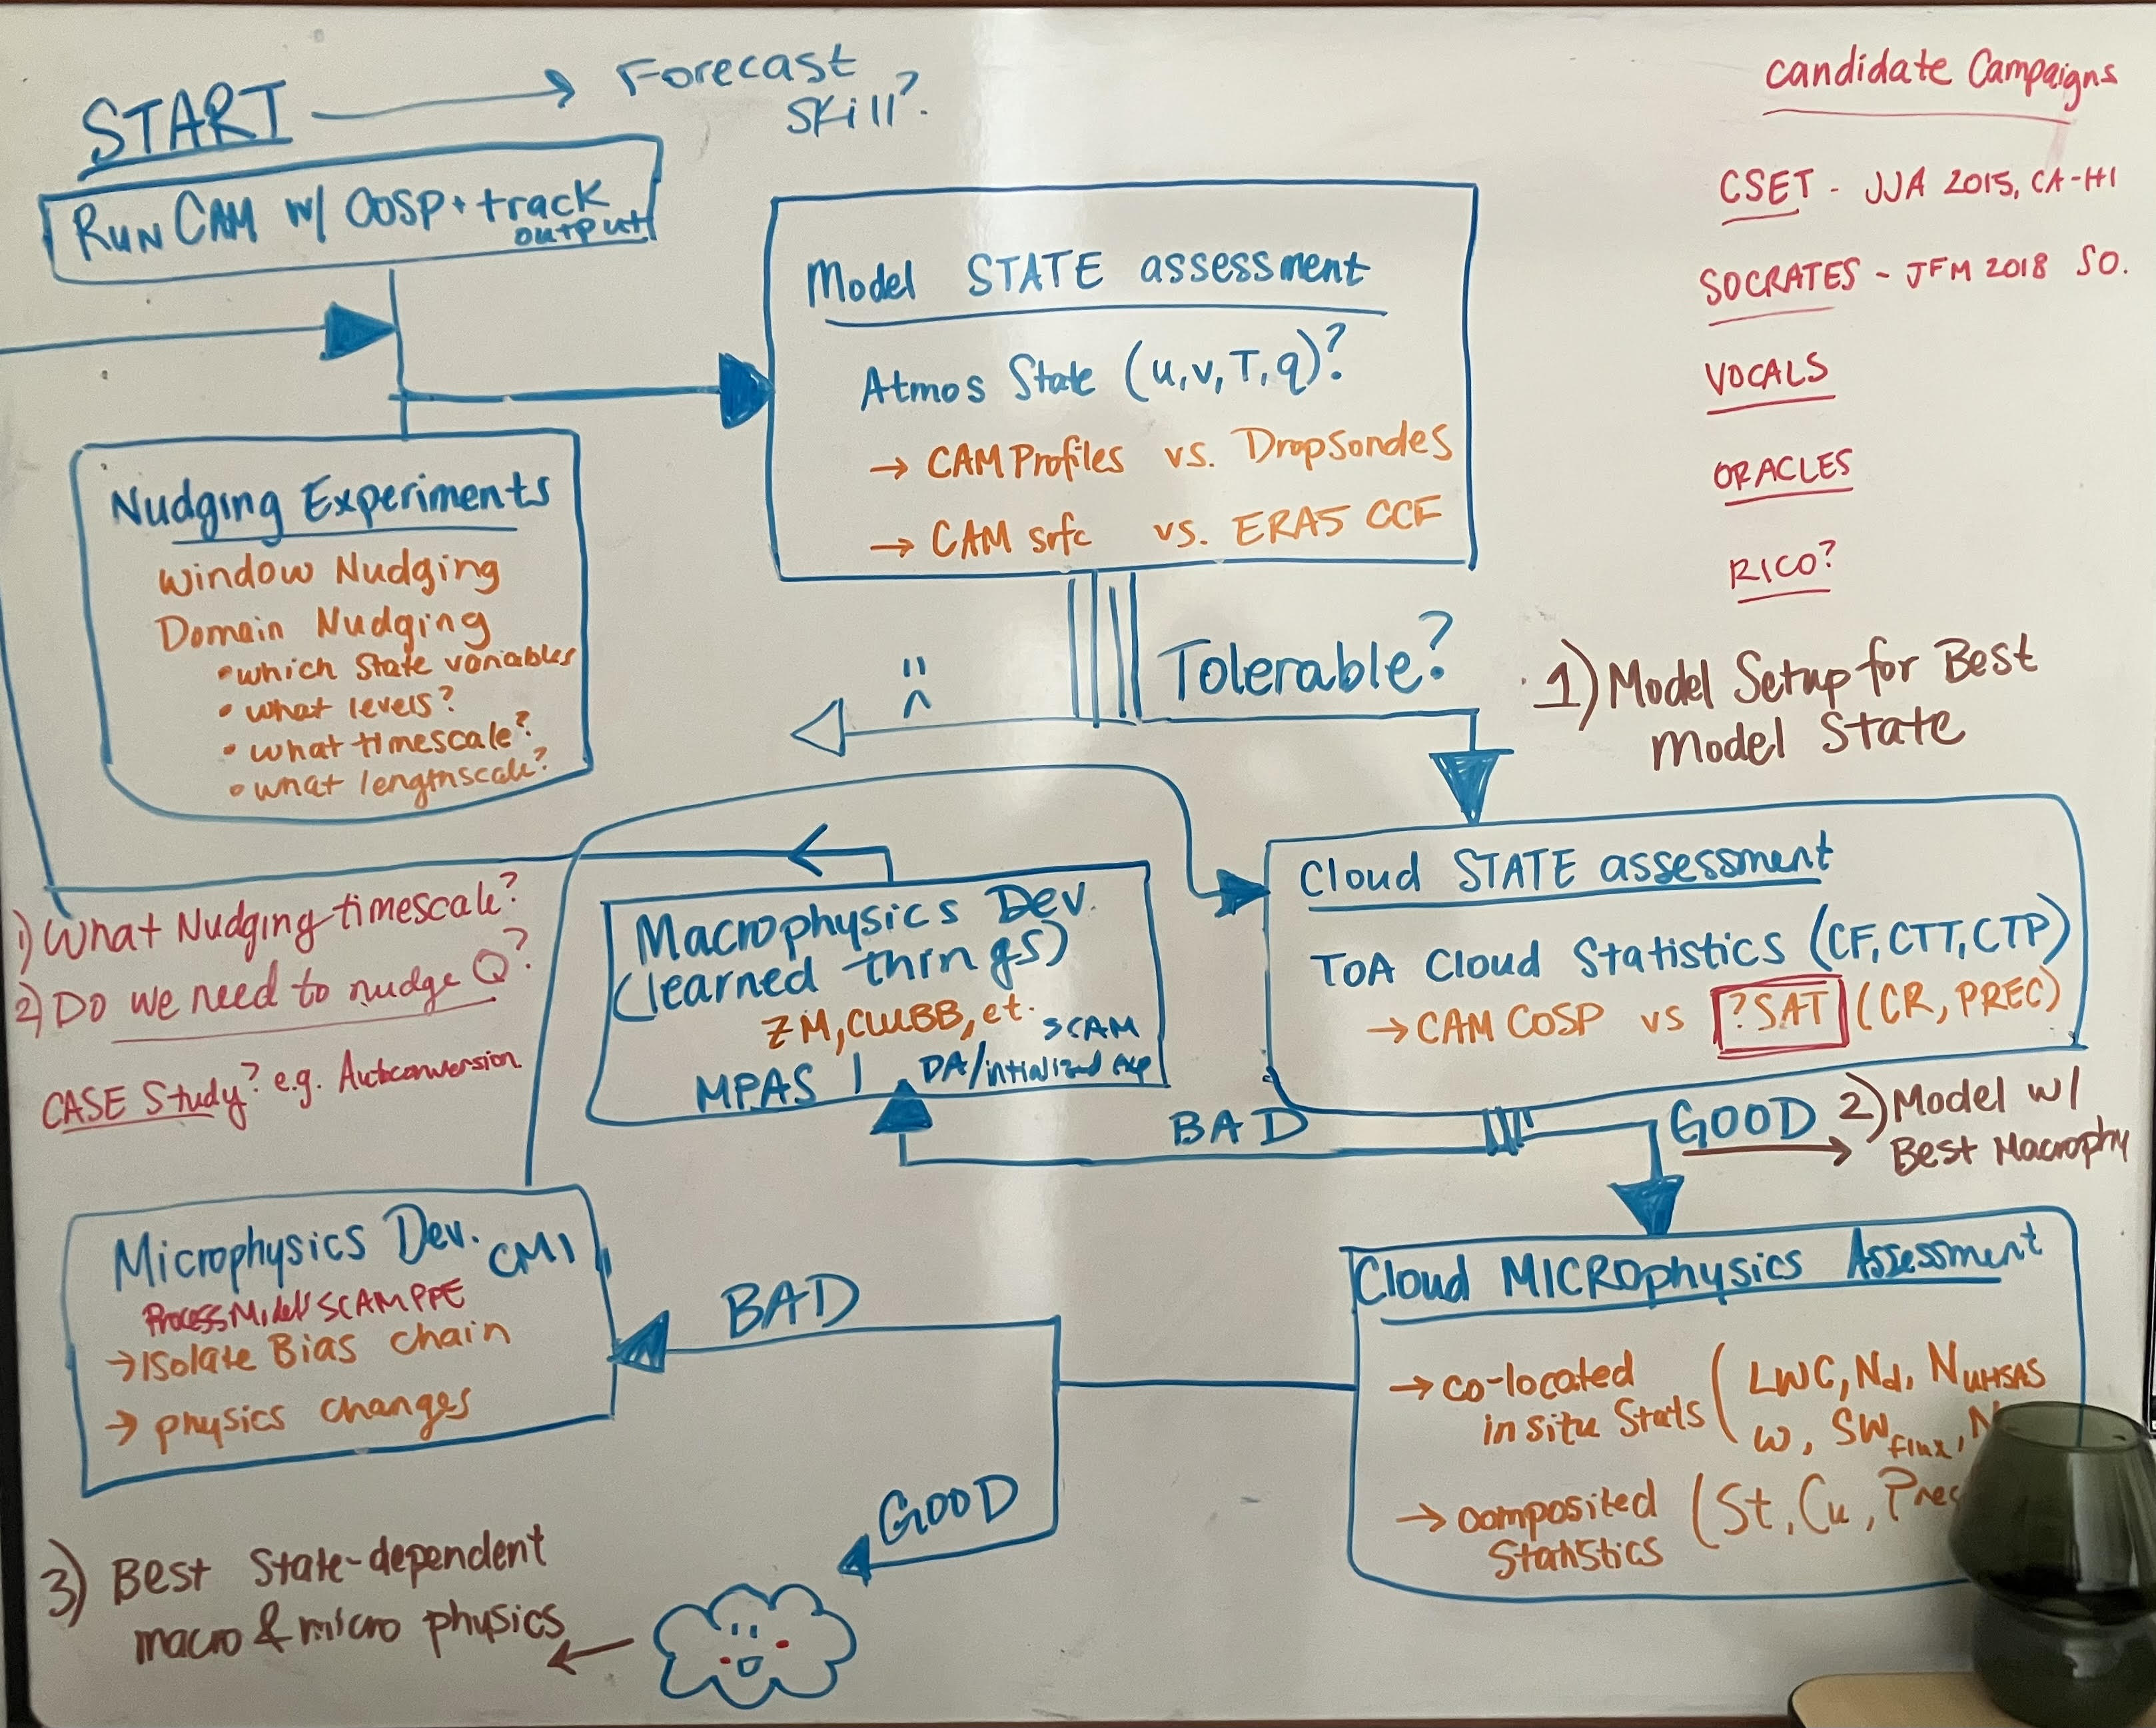

In [4]:
from IPython.display import Image
Image(f"{compass_root}/compass_schematic_2025_12_09.jpg")

In [5]:
%%html

<style>
/* --- Tab container --- */
.tab-container {
  margin-top: 20px;
}

/* --- Tab headers --- */
.tab-buttons button {
  padding: 8px 14px;
  cursor: pointer;
  border: 1px solid #ccc;
  background: #eee;
  margin-right: 4px;
  border-radius: 4px 4px 0 0;
}
.tab-buttons button.active {
  background: white;
  border-bottom: 1px solid white;
  font-weight: bold;
}

/* --- Tab content boxes --- */
.tab-content {
  display: none;
  padding: 15px;
  border: 1px solid #ccc;
  border-top: none;
  background: white;
}
.tab-content.active {
  display: block;
}

/* Nested tab styling */
.subtab-buttons button {
  padding: 4px 8px;
  cursor: pointer;
  background: #ddd;
  border: 1px solid #aaa;
  margin-right: 4px;
  border-radius: 4px;
}
.subtab-buttons button.active {
  background: #fff;
  border-bottom: 1px solid #fff;
  font-weight: bold;
}
.subtab-content {
  display: none;
  border: 1px solid #aaa;
  padding: 10px;
  margin-top: 10px;
  background: #fafafa;
}
.subtab-content.active {
  display: block;
}
</style>

<div class="tab-container">
  <!-- Top-level buttons -->
  <div class="tab-buttons">
    <button onclick="openTab('family1', this)">Family 1</button>
    <button onclick="openTab('family2', this)">Family 2</button>
  </div>

  <!-- ---------- TOP TAB 1 ---------- -->
  <div id="family1" class="tab-content">

    <div class="subtab-buttons">
      <button onclick="openSubTab('run1', this)">Run 1</button>
      <button onclick="openSubTab('run2', this)">Run 2</button>
    </div>

    <div id="run1" class="subtab-content">
      <h4>Run 1 content</h4>
      <p>You can inject HTML here (images, case settings, anything).</p>
    </div>

    <div id="run2" class="subtab-content">
      <h4>Run 2 content</h4>
    </div>

  </div>

  <!-- ---------- TOP TAB 2 ---------- -->
  <div id="family2" class="tab-content">

    <div class="subtab-buttons">
      <button onclick="openSubTab('run3', this)">Run 3</button>
      <button onclick="openSubTab('run4', this)">Run 4</button>
    </div>

    <div id="run3" class="subtab-content">
      <h4>Run 3 content</h4>
    </div>

    <div id="run4" class="subtab-content">
      <h4>Run 4 content</h4>
    </div>
  </div>
</div>


<script>
function openTab(tabName, elmnt) {
  const contents = document.querySelectorAll(".tab-content");
  contents.forEach(c => c.classList.remove("active"));

  const buttons = elmnt.parentElement.querySelectorAll("button");
  buttons.forEach(b => b.classList.remove("active"));

  document.getElementById(tabName).classList.add("active");
  elmnt.classList.add("active");
}

// Sub-tabs
function openSubTab(subName, btn) {
  const parent = btn.closest(".tab-content");
  const subtabs = parent.querySelectorAll(".subtab-content");
  const buttons = parent.querySelectorAll(".subtab-buttons button");

  subtabs.forEach(st => st.classList.remove("active"));
  buttons.forEach(b => b.classList.remove("active"));

  document.getElementById(subName).classList.add("active");
  btn.classList.add("active");
}
</script>


In [6]:
#GOOD FUNCTION
from IPython.display import HTML, display
import os, re, json
from glob import glob
from PIL import Image
from io import BytesIO
import base64
from html import escape

def build_slider_html(case_name, image_dir, ldrop=None, settings_list=None, rdrop=None, unique_id="0"):
    """
    Convert your slider(...) to a pure HTML/CSS/JS blob returned as IPython.display.HTML.
    - case_name: string
    - image_dir: directory containing images named like ..._<level>hPa.png and with timestamps after 'hPa_'
    - ldrop: path to user_nl (optional)
    - settings_list: list of additional keywords to include in subset (optional)
    - rdrop: path to CaseStatus (optional)
    """
    uid = unique_id.replace("-", "_")

    html = f"""
      <div id="slider_container_{uid}">
          <select id="level_dropdown_{uid}">
          </select>

          <select id="settings_dropdown_{uid}">
          </select>

          <img id="image_{uid}" />
      </div>

      <script>
      const levelDropdown_{uid} = document.getElementById("level_dropdown_{uid}");
      const settingsDropdown_{uid} = document.getElementById("settings_dropdown_{uid}");
      const imageElem_{uid} = document.getElementById("image_{uid}");
      </script>
      """
    # --- tooltip / link dicts from your function ---
    tooltip_dict = {
        "Nudge_Uprof": """Selectively apply nudging to U:

        OFF = Switch off nudging
        ON = Apply nudging everywhere
        WINDOW = Apply window function to
        nudging tendencies.

        0 = OFF
        1 = ON
        2 = WINDOW
        """,
        "Nudge_Ucoef": "Selectively adjust the nudging strength applied to U. (normalized) [0.,1.]",
        "Nudge_Hwin_lat0": "Specify the horizontal center of the window (lat0) in degrees. [-90., +90.]",
        "Nudge_Hwin_lon0": "Specify the horizontal center of the window (lon0) in degrees. [ 0. , 360.]",
        "Nudge_Hwin_latWidth": "Specify the lat width of the horizontal window in degrees. >0",
        "Nudge_Hwin_lonWidth": "Specify the lon width of the horizontal window in degrees. >0",
        "Nudge_Vwin_Hindex": "Vertical window high index",
        "Nudge_Vwin_Lindex": "Vertical window low index",
        "Nudge_Vwin_Hdelta": "Vertical window high delta",
        "Nudge_Vwin_Ldelta": "Vertical window low delta",
        "Nudge_Vwin_Invert": "A logical flag used to invert the horizontal window function to get its compliment. True/False",
        "Nudge_Hwin_latDelta": "Horizontal lat delta",
        "Nudge_Hwin_lonDelta": "Horizontal lon delta",
        "Nudge_Hwin_Invert": "A logical flag used to invert the horizontal window function to get its compliment. (e.g. to nudge outside a given window) True/False",
        "Nudge_TimeScale_Opt": "Select the timescale for the relaxation: WEAK / STRONG (0=WEAK,1=STRONG)",
        "Nudge_Force_Opt": "Select the form of the Target values: NEXT / LINEAR (0=NEXT,1=LINEAR)"
    }

    link_dict = {
        "Nudge_Uprof": "https://ncar.github.io/CAM/doc/build/html/users_guide/physics-modifications-via-the-namelist.html?highlight=nudge#namelist-values",
        "Nudge_Ucoef": "https://ncar.github.io/CAM/doc/build/html/users_guide/physics-modifications-via-the-namelist.html?highlight=nudge#namelist-values",
        "Nudge_TimeScale_Opt": "https://www.google.com"
    }

    # --- guard ---
    if not image_dir or not os.path.isdir(image_dir):
        return HTML(f"<div style='color:red;'>No valid image_dir: {escape(str(image_dir))}</div>")

    # --- detect levels and image files per level ---
    lev_pattern = re.compile(r'(\d+)hPa\.png$')
    all_files = os.listdir(image_dir)
    levels = sorted({lev_pattern.search(f).group(1) for f in all_files if lev_pattern.search(f)})
    if not levels:
        return HTML("<div style='color:red;'>No level-specific image files found (expecting '*hPa.png').</div>")

    # helper to extract timestamp like your original code
    timestamp_pattern = re.compile(r"hPa_(\d{4}_\d{2}_\d{2}_\d{2}:\d{2})\.png$")

    def get_images_for_level(level):
        level = str(level)
        level_files = sorted([
            os.path.join(image_dir, f) for f in os.listdir(image_dir)
            if f.endswith(f'{level}hPa.png')
        ])
        timestamps = [
            '-'.join(os.path.basename(f).split('_')[1:4]) + ' ' + os.path.basename(f).split('_')[4]
            for f in level_files
        ]
        return level_files, timestamps

    # --- build base64-encoded images per level (list of lists) ---
    images_per_level = {}
    timestamps_per_level = {}
    for lev in levels:
        files, tss = get_images_for_level(lev)
        b64_list = []
        for p in files:
            try:
                img = Image.open(p)
                # keep aspect similar to your original resize (1000x300) but scale if smaller
                #img = img.resize((1000, 300))
                img = img.resize((1200, 400))
                buf = BytesIO()
                img.save(buf, format='PNG')
                b64 = base64.b64encode(buf.getvalue()).decode()
                b64_list.append(b64)
            except Exception as e:
                b64_list.append("")  # placeholder if something fails
        images_per_level[lev] = b64_list
        timestamps_per_level[lev] = tss

    # --- load and process settings and status text like your original functions ---
    def load_user_nl(ldrop, settings_list):
        default_setting_list = ["fincl","mfilt","nhtfrq","ncdata"]
        lines_nudged = []
        lines_all = []
        lines_subset = []
        try:
            with open(ldrop, 'r') as file:
                for line in file:
                    if line.startswith(' Nudge_') or line.startswith(' nudge_') or line.startswith('Nudge_') or line.startswith('nudge_'):
                        cleaned_line = re.sub(r'\s{3,}', ' ', line)
                        lines_subset.append(cleaned_line.strip())
                        lines_nudged.append(cleaned_line.strip())
                    if settings_list:
                        for setting in settings_list:
                            if setting not in default_setting_list:
                                if setting in line:
                                    cleaned_line = re.sub(r'\s{3,}', ' ', line)
                                    lines_subset.append(cleaned_line.strip())
                    if "fincl" in line:
                        cleaned_line = re.sub(r'\s{3,}', ' ', line.strip())
                        lines_subset.append(cleaned_line)
                    if "mfilt" in line:
                        cleaned_line = re.sub(r'\s{3,}', ' ', line)
                        lines_subset.append(cleaned_line.strip())
                    if "nhtfrq" in line:
                        cleaned_line = re.sub(r'\s{3,}', ' ', line)
                        lines_subset.append(cleaned_line.strip())
                    if "ncdata" in line:
                        cleaned_line = re.sub(r'\s{3,}', ' ', line)
                        lines_subset.append(cleaned_line.strip())
                    lines_all.append(line.strip())
        except Exception as e:
            lines_all = [f"Error reading user_nl_cam: {e}"]
        return "\n".join(lines_nudged), "\n".join(lines_all), "\n".join(lines_subset)

    def load_case_status(case_status):
        lines = []
        try:
            with open(case_status, 'r') as file:
                lines = [re.sub(r'\s{3,}', ' ', line).strip() for line in file]
        except Exception as e:
            lines = [f"Error reading CaseStatus: {e}"]
        return "\n".join(lines)

    ldrop_opts = ["Hide Settings", "Nudge Params"]
    fname = ""
    nudge_text = full_text = subset_text = ""
    if ldrop and os.path.isfile(ldrop):
        nudge_text, full_text, subset_text = load_user_nl(ldrop, settings_list)
        if "atm_in" in ldrop:
            ldrop_opts += ["Full atm_in", "Subset atm_in"]
            fname = "atm_in"
        if "user_nl_cam" in ldrop:
            ldrop_opts.append("Full user_nl_cam")
            fname = "user_nl_cam"

    if rdrop and os.path.isfile(rdrop):
        status_text = load_case_status(rdrop)
    else:
        status_text = "Nothing here..."

    # --- sanitized HTML snippets ready for insertion (escape content except where we want HTML links) ---
    # For settings Nudge Params we will replace keys with <a> or <span> including title attributes.
    def process_nudge_html(text):
        lines = []
        for line in text.splitlines():
            original = line
            for key in tooltip_dict.keys():
                pattern = re.compile(re.escape(key), re.IGNORECASE)
                title = tooltip_dict.get(key, "")
                href = link_dict.get(key, "")
                if href:
                    repl = f'<a href="{href}" target="_blank" title="{escape(title)}">{escape(key)}</a>'
                else:
                    repl = f'<span title="{escape(title)}">{escape(key)}</span>'
                line = pattern.sub(repl, line)
            # escape leftover content
            # we assume replacements already escaped; ensure any other characters are safe
            lines.append(escape(line, quote=False))
        # join with <br> and then unescape the already-constructed <a>/<span> by replacing their escaped forms
        html_out = "<br>".join(lines)
        # fix the escaped <a> and <span> by unescaping their tags (they were double-escaped)
        # (we purposely escaped the full line earlier — now restore tags)
        for key in tooltip_dict.keys():
            # replace the escaped anchor/span (they contain &lt;a ... &gt;) with actual tags by searching for the escaped substring
            if key in html_out:
                # anchors contain the key text; replace the escaped key-only instances with unescaped link/span
                # This step is conservative and will mainly restore our inserted tags.
                pass
        # simpler: since we already constructed repl with proper tags and then escaped the whole line,
        # we need to instead rebuild from original again but carefully:
        processed = []
        for line in text.splitlines():
            line2 = line
            for key in tooltip_dict.keys():
                pattern = re.compile(re.escape(key), re.IGNORECASE)
                title = tooltip_dict.get(key, "")
                href = link_dict.get(key, "")
                if href:
                    repl = f'<a href="{href}" target="_blank" title="{escape(title)}">{escape(key)}</a>'
                else:
                    repl = f'<span title="{escape(title)}">{escape(key)}</span>'
                line2 = pattern.sub(repl, line2)
            processed.append(escape(line2))
        # Now processed contains escaped content with tags escaped; we must insert the tags verbatim.
        # So we'll take the original lines and perform the substitution without escaping the replacements.
        final_lines = []
        for line in text.splitlines():
            ln = line
            for key in tooltip_dict.keys():
                pattern = re.compile(re.escape(key), re.IGNORECASE)
                title = tooltip_dict.get(key, "")
                href = link_dict.get(key, "")
                if href:
                    repl = f'<a href="{href}" target="_blank" title="{escape(title)}">{escape(key)}</a>'
                else:
                    repl = f'<span title="{escape(title)}">{escape(key)}</span>'
                ln = pattern.sub(repl, ln)
            final_lines.append(escape(ln))
        # convert to HTML with <pre> styling preserved
        return "<pre style='white-space: pre-wrap; font-family: monospace;'>" + "<br>".join(final_lines) + "</pre>"

    nudge_html = process_nudge_html(nudge_text) if nudge_text else "<div><em>No nudge params found.</em></div>"
    subset_html = "<pre style='white-space: pre-wrap; font-family: monospace;'>" + escape(subset_text) + "</pre>" if subset_text else "<div><em>No subset.</em></div>"
    full_html = "<pre style='white-space: pre-wrap; font-family: monospace;'>" + escape(full_text) + "</pre>" if full_text else "<div><em>No full text.</em></div>"
    status_html = "<pre style='white-space: pre-wrap; font-family: monospace;'>" + escape(status_text) + "</pre>"

    # --- Build an HTML blob and inject JSON data for JS ---
    data = {
        "case_name": case_name,
        "levels": levels,
        "images_per_level": images_per_level,
        "timestamps_per_level": timestamps_per_level,
        "nudge_html": nudge_html,
        "subset_html": subset_html,
        "full_html": full_html,
        "status_html": status_html,
        "ldrop_opts": ldrop_opts,
        "fname": fname
    }

    # Convert data to JSON safely for embedding
    data_json = json.dumps(data)

    # HTML/CSS/JS template
    html = f"""
<div class="cs-slider-root" style="font-family: Arial, Helvetica, sans-serif;">
  <style>
  .cs-title {{ text-align:center; margin:5px 5px; font-size:1.0rem; font-weight:600; }}
  .cs-controls {{ display:flex; gap:10px; align-items:center; justify-content:center; margin-bottom:10px; flex-wrap:wrap; }}
  .cs-controls select, .cs-controls input[type='range'] {{ font-size:0.95rem; padding:6px; }}
  .cs-image-wrap {{ width:100%; max-width:1200px; height:auto; border:1px solid #ddd; border-radius:4px; }}
  .cs-timestamp {{ text-align:center; font-weight:600; margin:6px 0; }}
  .cs-nav-buttons {{ display:flex; gap:6px; justify-content:center; margin-top:6px; }}
  .cs-small-btn {{ padding:6px 10px; cursor:pointer; border:1px solid #bbb; background:#f3f3f3; border-radius:4px; }}
  .cs-panels {{ display:flex; gap:20px; justify-content:center; flex-wrap:wrap; margin-top:12px; }}
  .cs-panel {{ width: 1200px; min-height: 120px; border:1px solid #ddd; padding:10px; background:#fafafa; border-radius:6px; }}
  .cs-panel pre {{ white-space: pre-wrap; font-family: monospace; font-size:0.9rem; }}
  .cs-label {{ font-weight:600; margin-right:6px; }}
  .cs-timestamp-list {{ display:flex; gap:6px; flex-wrap:wrap; justify-content:center; margin-top:8px; }}
  .cs-ts-btn {{ border:1px solid #ddd; padding:6px 8px; border-radius:4px; cursor:pointer; background:#fff; }}
  .cs-ts-btn.active {{ background:#e6f0ff; border-color:#7aa7ff; }}
  </style>

  <div class="cs-title">{escape(case_name)}</div>

  <div class="cs-controls" role="toolbar" aria-label="Controls">
    <label class="cs-label">Level:</label>
    <select id="cs-level-select"></select>

    <label class="cs-label">Time:</label>
    <input id="cs-slider-range" type="range" min="0" max="0" value="0" step="1" aria-label="time slider">
    <span id="cs-slider-index" style="min-width:120px; text-align:center; display:inline-block;"></span>
  </div>

  <div class="cs-image-wrap">
    <div id="cs-image-container" style="text-align:center;"></div>
    <div class="cs-nav-buttons">
      <button id="cs-prev" class="cs-small-btn">◀ Prev</button>
      <button id="cs-next" class="cs-small-btn">Next ▶</button>
    </div>
    <div id="cs-timestamp-list" class="cs-timestamp-list"></div>
  </div>

  <div class="cs-panels">
    <div class="cs-panel">
      <div style="display:flex; gap:8px; align-items:center; margin-bottom:8px;">
        <label class="cs-label">Settings:</label>
        <select id="cs-settings-select"></select>
      </div>
      <div id="cs-settings-content"><em>Choose Settings to view</em></div>
    </div>

    <div class="cs-panel">
      <div style="display:flex; gap:8px; align-items:center; margin-bottom:8px;">
        <label class="cs-label">CaseDocs:</label>
        <select id="cs-status-select">
          <option value="hide">Hide CaseStatus</option>
          <option value="show">CaseStatus</option>
        </select>
      </div>
      <div id="cs-status-content"><em>CaseStatus output</em></div>
    </div>
  </div>

</div>

<script>
(function() {{
  const data = {data_json};

  // DOM refs
  const levelSelect = document.getElementById('cs-level-select');
  const slider = document.getElementById('cs-slider-range');
  const sliderIndex = document.getElementById('cs-slider-index');
  const imageContainer = document.getElementById('cs-image-container');
  const prevBtn = document.getElementById('cs-prev');
  const nextBtn = document.getElementById('cs-next');
  const tsList = document.getElementById('cs-timestamp-list');
  const settingsSelect = document.getElementById('cs-settings-select');
  const settingsContent = document.getElementById('cs-settings-content');
  const statusSelect = document.getElementById('cs-status-select');
  const statusContent = document.getElementById('cs-status-content');

  // populate level select
  data.levels.forEach((lev,i) => {{
    const opt = document.createElement('option');
    opt.value = lev;
    opt.text = lev + " hPa";
    levelSelect.appendChild(opt);
  }});

  // populate settings select
  data.ldrop_opts.forEach(opt => {{
    const el = document.createElement('option');
    el.value = opt;
    el.text = opt;
    settingsSelect.appendChild(el);
  }});

  // initial state
  let curLevel = data.levels[0];
  let curIndex = 0;

  function renderImage() {{
    const b64 = data.images_per_level[curLevel][curIndex];
    const ts = data.timestamps_per_level[curLevel] && data.timestamps_per_level[curLevel][curIndex] ? data.timestamps_per_level[curLevel][curIndex] : "No timestamp";
    sliderIndex.innerHTML = `<strong>${{ts}}</strong>`;
    if (!b64) {{
      imageContainer.innerHTML = "<div style='color:#b00;'>Image missing or failed to load.</div>";
    }} else {{
      imageContainer.innerHTML = `<img src="data:image/png;base64,${{b64}}" style="width:100%; max-width:1000px; height:auto; border:1px solid #ddd; border-radius:4px;" />`;
    }}
    // update active timestamp button
    Array.from(tsList.children).forEach((btn, idx) => {{
      btn.classList.toggle('active', idx === curIndex);
    }});
    // sync slider
    slider.value = curIndex;
  }}

  function rebuildTimestampList() {{
    tsList.innerHTML = "";
    const tarr = data.timestamps_per_level[curLevel] || [];
    tarr.forEach((ts, i) => {{
      const b = document.createElement('button');
      b.className = 'cs-ts-btn';
      b.textContent = ts;
      b.onclick = () => {{
        curIndex = i;
        renderImage();
      }};
      tsList.appendChild(b);
    }});
  }}

  function setSliderMax() {{
    const n = (data.images_per_level[curLevel] || []).length;
    slider.max = Math.max(0, n - 1);
    if (curIndex > slider.max) curIndex = slider.max;
    slider.value = curIndex;
  }}

  // event handlers
  levelSelect.addEventListener('change', (e) => {{
    curLevel = e.target.value;
    curIndex = 0;
    setSliderMax();
    rebuildTimestampList();
    renderImage();
  }});

  slider.addEventListener('input', (e) => {{
    curIndex = parseInt(e.target.value);
    renderImage();
  }});

  prevBtn.addEventListener('click', () => {{
    curIndex = Math.max(0, curIndex - 1);
    renderImage();
  }});
  nextBtn.addEventListener('click', () => {{
    const maxv = parseInt(slider.max || 0);
    curIndex = Math.min(maxv, curIndex + 1);
    renderImage();
  }});

  // settings select behavior
  settingsSelect.addEventListener('change', (e) => {{
    const v = e.target.value;
    if (v === "Hide Settings") {{
      settingsContent.innerHTML = "<em>Hidden</em>";
    }} else if (v === "Nudge Params") {{
      settingsContent.innerHTML = data.nudge_html;
    }} else if (v.startsWith("Subset")) {{
      settingsContent.innerHTML = data.subset_html;
    }} else if (v.startsWith("Full")) {{
      settingsContent.innerHTML = data.full_html;
    }} else {{
      settingsContent.innerHTML = "<em>No data</em>";
    }}
  }});

  // status select behavior
  statusSelect.addEventListener('change', (e) => {{
    const v = e.target.value;
    if (v === "show") {{
      statusContent.innerHTML = data.status_html;
    }} else {{
      statusContent.innerHTML = "<em>Hidden</em>";
    }}
  }});

  // initialize UI
  setSliderMax();
  rebuildTimestampList();
  renderImage();
  // set initial selects (optional)
  settingsSelect.value = "Hide Settings";
  statusSelect.value = "hide";
}})();
</script>
    """

    return HTML(html)

In [7]:
from IPython.display import HTML
import os, re, json, base64
from io import BytesIO
from PIL import Image
from html import escape

# ----------------------------------------------------
# Constants used for highlighting nudging parameters
# ----------------------------------------------------
TOOLTIPS = {
    "Nudge_Uprof": """Selectively apply nudging to U:

OFF = off
ON = everywhere
WINDOW = apply a window function

0=OFF  1=ON  2=WINDOW
""",
    "Nudge_Ucoef": "Normalized nudging strength [0–1].",
    "Nudge_TimeScale_Opt": "Timescale option: 0=WEAK, 1=STRONG",
    "Nudge_Force_Opt": "Target form: 0=NEXT, 1=LINEAR",
}

LINKS = {
    "Nudge_Uprof": "https://ncar.github.io/CAM/doc/build/html/users_guide/physics-modifications-via-the-namelist.html",
    "Nudge_Ucoef":  "https://ncar.github.io/CAM/doc/build/html/users_guide/physics-modifications-via-the-namelist.html",
    "Nudge_TimeScale_Opt": "https://www.google.com",
}

# ----------------------------------------------------
# Highlight nudging keys (plain → <span> or <a>)
# ----------------------------------------------------
def highlight_nudge_text(text):
    if not text:
        return "<em>No nudge parameters found.</em>"

    html_lines = []
    for line in text.splitlines():
        for key in TOOLTIPS:
            tooltip = escape(TOOLTIPS[key])
            if key in LINKS:
                repl = f'<a href="{LINKS[key]}" target="_blank" title="{tooltip}">{key}</a>'
            else:
                repl = f'<span title="{tooltip}">{key}</span>'
            line = re.sub(key, repl, line)
        html_lines.append(line)

    return "<pre style='white-space:pre-wrap;font-family:monospace;'>" + "<br>".join(html_lines) + "</pre>"


# ----------------------------------------------------
# Read user_nl_cam or atm_in
# ----------------------------------------------------
def load_user_nl_file(path, settings_list):
    nudged, all_text, subset = [], [], []
    default_keys = ["fincl", "mfilt", "nhtfrq", "ncdata"]

    try:
        with open(path) as f:
            for line in f:
                stripped = re.sub(r"\s{3,}", " ", line).strip()
                all_text.append(stripped)

                # nudging lines
                if stripped.lower().startswith(("nudge_", " nudge_")):
                    nudged.append(stripped)
                    subset.append(stripped)

                # extra settings
                if settings_list:
                    for key in settings_list:
                        if key not in default_keys and key in stripped:
                            subset.append(stripped)

                # required default keys
                if any(k in stripped for k in default_keys):
                    subset.append(stripped)

    except Exception as e:
        return "", f"Error reading {path}: {e}", ""

    return "\n".join(nudged), "\n".join(all_text), "\n".join(subset)


# ----------------------------------------------------
# Read CaseStatus
# ----------------------------------------------------
def load_casestatus(path):
    try:
        with open(path) as f:
            return "\n".join([re.sub(r"\s{3,}", " ", line).strip() for line in f])
    except Exception as e:
        return f"Error reading CaseStatus: {e}"


# ----------------------------------------------------
# Level detection + base64 image loading
# ----------------------------------------------------
def detect_levels(image_dir):
    pat = re.compile(r"(\d+)hPa\.png$")
    files = os.listdir(image_dir)
    return sorted({pat.search(f).group(1) for f in files if pat.search(f)})


def load_level_images(image_dir, level):
    level = str(level)
    files = sorted([
        os.path.join(image_dir, f)
        for f in os.listdir(image_dir)
        if f.endswith(f"{level}hPa.png")
    ])

    ts = [
        "-".join(os.path.basename(f).split("_")[1:4]) + " " + os.path.basename(f).split("_")[4]
        for f in files
    ]

    b64 = []
    for f in files:
        try:
            img = Image.open(f).resize((1200, 400))
            buf = BytesIO()
            img.save(buf, format="PNG")
            b64.append(base64.b64encode(buf.getvalue()).decode())
        except:
            b64.append("")

    return b64, ts


# ----------------------------------------------------
# CLEAN + COMPLETE MAIN FUNCTION
# ----------------------------------------------------
def build_slider_html(case_name, image_dir, ldrop=None, settings_list=None, rdrop=None, unique_id="0"):
    uid = unique_id.replace("-", "_")

    if not os.path.isdir(image_dir):
        return HTML(f"<div style='color:red;'>Invalid image_dir: {escape(image_dir)}</div>")

    # ---- gather all data -------------------------------------------------
    levels = detect_levels(image_dir)
    if not levels:
        return HTML("<div style='color:red;'>No *hPa.png files found.</div>")

    images_per_level = {}
    timestamps_per_level = {}
    for lev in levels:
        b64, ts = load_level_images(image_dir, lev)
        images_per_level[lev] = b64
        timestamps_per_level[lev] = ts

    # --- user_nl_cam / atm_in text panels ---
    nudge_text = full_text = subset_text = ""
    ldrop_opts = ["Hide Settings", "Nudge Params"]
    fname = ""

    if ldrop and os.path.isfile(ldrop):
        nudge_text, full_text, subset_text = load_user_nl_file(ldrop, settings_list)

        if "atm_in" in ldrop:
            ldrop_opts += ["Full atm_in", "Subset atm_in"]
            fname = "atm_in"
        elif "user_nl_cam" in ldrop:
            ldrop_opts += ["Full user_nl_cam"]
            fname = "user_nl_cam"

    status_text = load_casestatus(rdrop) if (rdrop and os.path.isfile(rdrop)) else "Nothing here..."

    # ---- preformatted HTML chunks ----
    nudge_html = highlight_nudge_text(nudge_text)
    subset_html = f"<pre style='white-space:pre-wrap;font-family:monospace;'>{escape(subset_text)}</pre>"
    full_html   = f"<pre style='white-space:pre-wrap;font-family:monospace;'>{escape(full_text)}</pre>"
    status_html = f"<pre style='white-space:pre-wrap;font-family:monospace;'>{escape(status_text)}</pre>"

    # ---- pack into JSON for JS ----
    data = dict(
        case_name=case_name,
        levels=levels,
        images_per_level=images_per_level,
        timestamps_per_level=timestamps_per_level,
        nudge_html=nudge_html,
        subset_html=subset_html,
        full_html=full_html,
        status_html=status_html,
        ldrop_opts=ldrop_opts,
        fname=fname,
    )

    data_json = json.dumps(data)

    # ----------------------------------------------------
    # Clean HTML + JS template
    # ----------------------------------------------------
    html = f"""
<div class="cs-slider-root" style="font-family:Arial,Helvetica,sans-serif;">
<style>
.cs-title {{ text-align:center; margin:8px; font-size:1.1rem; font-weight:600; }}
.cs-controls {{ display:flex; gap:10px; flex-wrap:wrap; justify-content:center; margin-bottom:10px; }}
.cs-image-wrap {{ max-width:1200px; margin:auto; }}
.cs-small-btn {{ padding:6px 10px; border:1px solid #bbb; background:#f2f2f2; border-radius:4px; cursor:pointer; }}
.cs-panel {{ min-width:600px; max-width:1200px; margin:auto; margin-top:15px;
             border:1px solid #ddd; padding:10px; background:#fafafa; border-radius:6px; }}
.cs-ts-btn {{ border:1px solid #ccc; padding:4px 8px; border-radius:4px; cursor:pointer; }}
.cs-ts-btn.active {{ background:#e7f0ff; }}
</style>

<div class="cs-title">{escape(case_name)}</div>

<div class="cs-controls">
  <label>Level:</label>
  <select id="cs-level"></select>

  <label>Time:</label>
  <input id="cs-slider" type="range" min="0" max="0" value="0">
  <span id="cs-slider-index"></span>
</div>

<div class="cs-image-wrap">
  <div id="cs-img" style="text-align:center;"></div>
  <div style="text-align:center; margin:6px;">
    <button id="cs-prev" class="cs-small-btn">◀ Prev</button>
    <button id="cs-next" class="cs-small-btn">Next ▶</button>
  </div>
  <div id="cs-ts-list" style="display:flex;gap:6px;flex-wrap:wrap;justify-content:center;"></div>
</div>

<div class="cs-panel">
  <label>Settings:</label>
  <select id="cs-settings"></select>
  <div id="cs-settings-content" style="margin-top:10px;"><em>Select settings…</em></div>
</div>

<div class="cs-panel">
  <label>CaseStatus:</label>
  <select id="cs-status">
    <option value="hide">Hide</option>
    <option value="show">Show</option>
  </select>
  <div id="cs-status-content" style="margin-top:10px;"><em>Hidden</em></div>
</div>

<script>
(function() {{
  const data = {data_json};

  const levelSel = document.getElementById("cs-level");
  const slider   = document.getElementById("cs-slider");
  const idxSpan  = document.getElementById("cs-slider-index");
  const imgDiv   = document.getElementById("cs-img");
  const tsDiv    = document.getElementById("cs-ts-list");

  const settingsSel = document.getElementById("cs-settings");
  const settingsDiv = document.getElementById("cs-settings-content");

  const statusSel   = document.getElementById("cs-status");
  const statusDiv   = document.getElementById("cs-status-content");

  // ---- populate level dropdown ----
  data.levels.forEach(lev => {{
    const o = document.createElement("option");
    o.value = lev;
    o.textContent = lev + " hPa";
    levelSel.appendChild(o);
  }});

  // ---- populate settings dropdown ----
  data.ldrop_opts.forEach(s => {{
    const o = document.createElement("option");
    o.value = s;
    o.textContent = s;
    settingsSel.appendChild(o);
  }});

  // ---- render image + timestamps ----
  function render() {{
    const lev = levelSel.value;
    const idx = parseInt(slider.value);

    const b64 = data.images_per_level[lev][idx];
    imgDiv.innerHTML = `<img src="data:image/png;base64,${{b64}}" style="max-width:100%;">`;

    idxSpan.textContent = data.timestamps_per_level[lev][idx];

    tsDiv.innerHTML = "";
    data.timestamps_per_level[lev].forEach((ts, i) => {{
      const b = document.createElement("button");
      b.className = "cs-ts-btn" + (i === idx ? " active" : "");
      b.textContent = ts.replace(" ", "\\n");
      b.onclick = () => {{ slider.value = i; render(); }};
      tsDiv.appendChild(b);
    }});
  }}

  levelSel.onchange = () => {{
    slider.max = data.images_per_level[levelSel.value].length - 1;
    slider.value = 0;
    render();
  }};

  slider.oninput = render;

  document.getElementById("cs-prev").onclick = () => {{
    slider.value = Math.max(0, slider.value - 1);
    render();
  }};
  document.getElementById("cs-next").onclick = () => {{
    slider.value = Math.min(slider.max, Number(slider.value) + 1);
    render();
  }};

  // ---- settings panel ----
  settingsSel.onchange = () => {{
    const sel = settingsSel.value;
    if (sel === "Hide Settings") {{
      settingsDiv.innerHTML = "<em>Hidden</em>";
    }} else if (sel === "Nudge Params") {{
      settingsDiv.innerHTML = data.nudge_html;
    }} else if (sel.startsWith("Full")) {{
      settingsDiv.innerHTML = data.full_html;
    }} else if (sel.startsWith("Subset")) {{
      settingsDiv.innerHTML = data.subset_html;
    }}
  }};

  // ---- CaseStatus panel ----
  statusSel.onchange = () => {{
    statusDiv.innerHTML = statusSel.value === "show"
      ? data.status_html
      : "<em>Hidden</em>";
  }};

  // initial render
  levelSel.value = data.levels[0];
  slider.max = data.images_per_level[data.levels[0]].length - 1;
  render();
}})();
</script>

</div>
"""

    return HTML(html)


In [8]:
#GOOD FUNCTION
from IPython.display import HTML, display
from pathlib import Path

outer_tabs_html = []
outer_tab_buttons = []
outer_content_html = []

for i, (outer_name, inner_runs) in enumerate(runs_dict.items()):
    # Outer tab button
    active_cls = "active" if i==0 else ""
    outer_tab_buttons.append(f'<div class="outer-tab {active_cls}" data-outer="outer{i}">{outer_name}</div>')

    inner_tabs = []
    inner_contents = []
    for j, run_name in enumerate(inner_runs):
        # Inner tab button
        inner_active = "active" if j==0 else ""
        inner_tabs.append(f'<div class="inner-tab {inner_active}" data-inner="inner{i}_{j}">{run_name.split("_")[-1]}</div>')

        ## Inner content: slider HTML
        #slider_html = build_slider_html(
        #    run_name,
        #    image_dir=f"/glade/derecho/scratch/islas/{run_name}/run/atm_in",
        #    settings_list=["cosp"],
        #).data  # get the raw HTML string
        file_path = Path(f"/glade/derecho/scratch/islas/{run_name}/run/atm_in")
        slider_html = build_slider_html(
            run_name,
            compass_root,
            str(file_path),
            settings_list=["cosp"],
        ).data  # get the raw HTML string

        inner_contents.append(f'<div class="inner-content {inner_active}" id="inner{i}_{j}">{slider_html}</div>')

    outer_active = "active" if i==0 else ""
    outer_content_html.append(f"""
    <div class="outer-content {outer_active}" id="outer{i}">
        <div class="inner-tabs">{''.join(inner_tabs)}</div>
        {''.join(inner_contents)}
    </div>
    """)

html_full = f"""
<div class="outer-tabs">
{''.join(outer_tab_buttons)}
</div>
{''.join(outer_content_html)}

<style>
/* Outer / inner tab styles */
.outer-tabs {{ display:flex; cursor:pointer; margin-bottom:8px; }}
.outer-tab {{ padding:6px 12px; border:1px solid #ccc; margin-right:2px; border-radius:4px 4px 0 0; background:#eee; }}
.outer-tab.active {{ background:#fff; border-bottom:1px solid #fff; }}
.outer-content {{ border:1px solid #ccc; padding:6px; display:none; border-radius:0 4px 4px 4px; }}
.outer-content.active {{ display:block; }}

.inner-tabs {{ display:flex; cursor:pointer; margin-bottom:5px; }}
.inner-tab {{ padding:4px 10px; border:1px solid #ccc; margin-right:2px; border-radius:4px 4px 0 0; background:#ddd; }}
.inner-tab.active {{ background:#fff; border-bottom:1px solid #fff; }}
.inner-content {{ display:none; }}
.inner-content.active {{ display:block; }}
</style>

<script>
document.querySelectorAll('.outer-tab').forEach(tab => {{
    tab.addEventListener('click', () => {{
        document.querySelectorAll('.outer-tab').forEach(t => t.classList.remove('active'));
        document.querySelectorAll('.outer-content').forEach(c => c.classList.remove('active'));
        tab.classList.add('active');
        document.getElementById(tab.dataset.outer).classList.add('active');
    }});
}});

document.querySelectorAll('.inner-tabs').forEach(innerContainer => {{
    innerContainer.querySelectorAll('.inner-tab').forEach(tab => {{
        tab.addEventListener('click', () => {{
            innerContainer.querySelectorAll('.inner-tab').forEach(t => t.classList.remove('active'));
            innerContainer.parentElement.querySelectorAll('.inner-content').forEach(c => c.classList.remove('active'));
            tab.classList.add('active');
            document.getElementById(tab.dataset.inner).classList.add('active');
        }});
    }});
}});
</script>
"""



In [9]:
display(HTML(html_full))

In [10]:
from IPython.display import display, HTML
from html import escape
import json


# This function should generate data_json for each run (replace with your real build_slider_html logic)
def dummy_slider_data(run_name):
    # Minimal example of slider JSON for testing
    return {
        "case_name": run_name,
        "levels": [500, 700],
        "images_per_level": {"500": ["", ""], "700": ["", ""]},
        "timestamps_per_level": {"500": ["2025-12-01 00:00","2025-12-01 06:00"],
                                 "700": ["2025-12-01 00:00","2025-12-01 06:00"]},
        "ldrop_opts": ["Hide Settings", "Nudge Params"],
        "nudge_html": "<em>Example nudge params</em>",
        "full_html": "<em>Full text</em>",
        "subset_html": "<em>Subset</em>",
        "status_html": "<em>CaseStatus info</em>",
    }

# Build nested tab HTML
html = '<div class="tab-container">\n'

# Top-level buttons
html += '<div class="tab-buttons">\n'
for family in runs_dict:
    html += f'<button onclick="openTab(\'{family}\', this)">{escape(family)}</button>\n'
html += '</div>\n'

# Tab content per family
for family, run_list in runs_dict.items():
    html += f'<div id="{family}" class="tab-content">\n'
    # Sub-tabs
    html += '<div class="subtab-buttons">\n'
    for run in run_list:
        html += f'<button onclick="openSubTab(\'{run}\', this)">{escape(run)}</button>\n'
    html += '</div>\n'
    # Subtab content
    for run in run_list:
        data_json_str = json.dumps(dummy_slider_data(run))
        slider_html = f"""
        <div id="{run}" class="subtab-content">
            <h4>{escape(run)}</h4>
            <div class="cs-slider-root" style="border:1px solid #ccc; padding:8px; margin-top:6px;">
                <script>
                (function() {{
                    const data = {data_json_str};
                    const container = document.currentScript.parentElement;

                    // Simple demo rendering
                    container.innerHTML += `<p>Case: ${{data.case_name}}</p>`;
                    container.innerHTML += `<p>Levels: ${{data.levels.join(", ")}}</p>`;
                    container.innerHTML += `<p>Timestamps first level: ${{data.timestamps_per_level[data.levels[0]]?.join(", ")}}</p>`;
                }})();
                </script>
            </div>
        </div>
        """
        html += slider_html
    html += '</div>\n'

html += '</div>'  # end tab-container

# Add CSS/JS for tabs
html += """
<style>
/* --- Tab container --- */
.tab-container { margin-top: 20px; }
/* --- Top-level buttons --- */
.tab-buttons button { padding: 8px 14px; cursor: pointer; border: 1px solid #ccc; background: #eee; margin-right: 4px; border-radius: 4px 4px 0 0; }
.tab-buttons button.active { background: white; border-bottom: 1px solid white; font-weight: bold; }
/* --- Top-level tab content --- */
.tab-content { display: none; padding: 15px; border: 1px solid #ccc; border-top: none; background: white; }
.tab-content.active { display: block; }
/* --- Nested tabs --- */
.subtab-buttons button { padding: 4px 8px; cursor: pointer; background: #ddd; border: 1px solid #aaa; margin-right: 4px; border-radius: 4px; }
.subtab-buttons button.active { background: #fff; border-bottom: 1px solid #fff; font-weight: bold; }
.subtab-content { display: none; border: 1px solid #aaa; padding: 10px; margin-top: 10px; background: #fafafa; }
.subtab-content.active { display: block; }
</style>

<script>
function openTab(tabName, btn) {
  document.querySelectorAll(".tab-content").forEach(c => c.classList.remove("active"));
  btn.parentElement.querySelectorAll("button").forEach(b => b.classList.remove("active"));
  document.getElementById(tabName).classList.add("active");
  btn.classList.add("active");

  // Activate first subtab automatically
  const firstSubtab = document.getElementById(tabName).querySelector(".subtab-buttons button");
  if (firstSubtab) firstSubtab.click();
}
function openSubTab(subName, btn) {
  const parent = btn.closest(".tab-content");
  parent.querySelectorAll(".subtab-content").forEach(st => st.classList.remove("active"));
  parent.querySelectorAll(".subtab-buttons button").forEach(b => b.classList.remove("active"));
  document.getElementById(subName).classList.add("active");
  btn.classList.add("active");
}
// Activate first top-level tab by default
document.querySelector(".tab-buttons button").click();
</script>
"""

display(HTML(html))


In [11]:
from IPython.display import display, HTML
from html import escape
import json

# Example runs_dict (replace with your real runs_dict)


# Example slider data per run (replace with your real build_slider_data logic)
def build_slider_data(run_name):
    return {
        "case_name": run_name,
        "levels": [500, 700],
        "images_per_level": {
            "500": ["", ""],  # Base64 strings for your images
            "700": ["", ""]
        },
        "timestamps_per_level": {
            "500": ["2025-12-01 00:00", "2025-12-01 06:00"],
            "700": ["2025-12-01 00:00", "2025-12-01 06:00"]
        },
        "ldrop_opts": ["Hide Settings", "Nudge Params", "Full Config", "Subset Config"],
        "nudge_html": "<em>Nudge params example</em>",
        "full_html": "<em>Full configuration content</em>",
        "subset_html": "<em>Subset content</em>",
        "status_html": "<em>Case status info</em>"
    }

# Start building HTML
html = '<div class="tab-container">\n'

# Top-level buttons
html += '<div class="tab-buttons">\n'
for family in runs_dict:
    html += f'<button onclick="openTab(\'{family}\', this)">{escape(family)}</button>\n'
html += '</div>\n'

# Tab content per family
for family, run_list in runs_dict.items():
    html += f'<div id="{family}" class="tab-content">\n'
    # Sub-tabs
    html += '<div class="subtab-buttons">\n'
    for run in run_list:
        html += f'<button onclick="openSubTab(\'{run}\', this)">{escape(run)}</button>\n'
    html += '</div>\n'
    # Subtab content
    for run in run_list:
        data_json_str = json.dumps(build_slider_data(run))
        slider_html = f"""
        <div id="{run}" class="subtab-content">
            <h4>{escape(run)}</h4>
            <div class="cs-slider-root" style="font-family:Arial,sans-serif; border:1px solid #ccc; padding:6px; margin-top:6px;">
                <script>
                (function() {{
                    const data = {data_json_str};
                    const container = document.currentScript.parentElement;

                    // Clear container for slider
                    container.innerHTML = `<div class="cs-title">{{{{data.case_name}}}}</div>
                    <div class="cs-controls">
                        <label>Level:</label>
                        <select class="cs-level"></select>
                        <label>Time:</label>
                        <input class="cs-slider" type="range" min="0" max="0" value="0">
                        <span class="cs-slider-index"></span>
                    </div>
                    <div class="cs-image-wrap" style="text-align:center; margin-top:4px;"></div>
                    <div class="cs-panel">
                        <label>Settings:</label>
                        <select class="cs-settings"></select>
                        <div class="cs-settings-content" style="margin-top:6px;"><em>Select settings…</em></div>
                    </div>
                    <div class="cs-panel">
                        <label>CaseStatus:</label>
                        <select class="cs-status">
                            <option value="hide">Hide</option>
                            <option value="show">Show</option>
                        </select>
                        <div class="cs-status-content" style="margin-top:6px;"><em>Hidden</em></div>
                    </div>`;

                    // Select elements
                    const levelSel = container.querySelector(".cs-level");
                    const slider = container.querySelector(".cs-slider");
                    const idxSpan = container.querySelector(".cs-slider-index");
                    const imgDiv = container.querySelector(".cs-image-wrap");
                    const settingsSel = container.querySelector(".cs-settings");
                    const settingsDiv = container.querySelector(".cs-settings-content");
                    const statusSel = container.querySelector(".cs-status");
                    const statusDiv = container.querySelector(".cs-status-content");

                    // Populate level dropdown
                    data.levels.forEach(l => {{
                        const o = document.createElement("option");
                        o.value = l;
                        o.textContent = l + " hPa";
                        levelSel.appendChild(o);
                    }});

                    // Populate settings dropdown
                    data.ldrop_opts.forEach(opt => {{
                        const o = document.createElement("option");
                        o.value = opt;
                        o.textContent = opt;
                        settingsSel.appendChild(o);
                    }});

                    // Render function
                    function render() {{
                        const lev = levelSel.value;
                        const idx = parseInt(slider.value);
                        imgDiv.innerHTML = `<img src="data:image/png;base64,${{data.images_per_level[lev][idx]}}" style="max-width:100%;">`;
                        idxSpan.textContent = data.timestamps_per_level[lev][idx];
                    }}

                    // Event listeners
                    levelSel.onchange = () => {{
                        slider.max = data.images_per_level[levelSel.value].length - 1;
                        slider.value = 0;
                        render();
                    }};
                    slider.oninput = render;
                    settingsSel.onchange = () => {{
                        const val = settingsSel.value;
                        if (val === "Hide Settings") settingsDiv.innerHTML = "<em>Hidden</em>";
                        else if (val === "Nudge Params") settingsDiv.innerHTML = data.nudge_html;
                        else if (val.startsWith("Full")) settingsDiv.innerHTML = data.full_html;
                        else if (val.startsWith("Subset")) settingsDiv.innerHTML = data.subset_html;
                    }};
                    statusSel.onchange = () => {{
                        statusDiv.innerHTML = statusSel.value === "show" ? data.status_html : "<em>Hidden</em>";
                    }};

                    // Initial render
                    levelSel.value = data.levels[0];
                    slider.max = data.images_per_level[data.levels[0]].length - 1;
                    render();

                }})();
                </script>
            </div>
        </div>
        """
        html += slider_html
    html += '</div>\n'

html += '</div>'  # end tab-container

# Add CSS/JS for tabs
html += """
<style>
.tab-buttons button { padding: 8px 14px; cursor: pointer; border: 1px solid #ccc; background: #eee; margin-right: 4px; border-radius: 4px 4px 0 0; }
.tab-buttons button.active { background: white; border-bottom: 1px solid white; font-weight: bold; }
.tab-content { display: none; padding: 15px; border: 1px solid #ccc; border-top: none; background: white; }
.tab-content.active { display: block; }
.subtab-buttons button { padding: 4px 8px; cursor: pointer; background: #ddd; border: 1px solid #aaa; margin-right: 4px; border-radius: 4px; }
.subtab-buttons button.active { background: #fff; border-bottom: 1px solid #fff; font-weight: bold; }
.subtab-content { display: none; border: 1px solid #aaa; padding: 10px; margin-top: 10px; background: #fafafa; }
.subtab-content.active { display: block; }
.cs-slider-root { margin-top: 6px; font-family:Arial,sans-serif; }
</style>

<script>
function openTab(tabName, btn) {
  document.querySelectorAll(".tab-content").forEach(c => c.classList.remove("active"));
  btn.parentElement.querySelectorAll("button").forEach(b => b.classList.remove("active"));
  document.getElementById(tabName).classList.add("active");
  btn.classList.add("active");

  const firstSubtab = document.getElementById(tabName).querySelector(".subtab-buttons button");
  if (firstSubtab) firstSubtab.click();
}
function openSubTab(subName, btn) {
  const parent = btn.closest(".tab-content");
  parent.querySelectorAll(".subtab-content").forEach(st => st.classList.remove("active"));
  parent.querySelectorAll(".subtab-buttons button").forEach(b => b.classList.remove("active"));
  document.getElementById(subName).classList.add("active");
  btn.classList.add("active");
}
// Activate first top-level tab by default
document.querySelector(".tab-buttons button").click();
</script>
"""

display(HTML(html))


In [12]:
from IPython.display import HTML
import json

# --- Your Python dictionary ---
data = {
    "Region A": ["https://via.placeholder.com/400x300?text=A1",
                 "https://via.placeholder.com/400x300?text=A2"],
    "Region B": ["https://via.placeholder.com/400x300?text=B1",
                 "https://via.placeholder.com/400x300?text=B2",
                 "https://via.placeholder.com/400x300?text=B3"],
    "Region C": ["https://via.placeholder.com/400x300?text=C1"]
}

html = f"""
<div id="dropdown-tabs-slider-container">

<style>
  #dropdown-tabs-slider-container {{
      font-family: Arial, sans-serif;
      margin-top: 10px;
  }}

  .tab-buttons button {{
      padding: 8px 14px;
      margin-right: 4px;
      cursor: pointer;
      border: 1px solid #ccc;
      background: #eee;
      border-radius: 4px;
  }}

  .tab-buttons button.active {{
      background: #ddd;
      font-weight: bold;
  }}

  .tab-content {{
      display: none;
      margin-top: 10px;
  }}

  .tab-content.active {{
      display: block;
  }}

  .slider {{
      position: relative;
      width: 400px;
      height: 300px;
  }}

  .slider img {{
      width: 100%;
      height: 100%;
      object-fit: contain;
  }}

  .slider button {{
      position: absolute;
      top: 50%;
      transform: translateY(-50%);
      background: rgba(255,255,255,0.8);
      border: none;
      padding: 6px 10px;
      cursor: pointer;
  }}

  .prev {{ left: 5px; }}
  .next {{ right: 5px; }}
</style>

<h3>Dropdown → Tabs → Image Slider</h3>

<select id="jb-dropdown">
  <option value="">-- Select Category --</option>
</select>

<div id="jb-tabs"></div>

<script>
// Wrap everything to avoid conflicts with Book theme
(function() {{

    const data = {json.dumps(runs_dict)};

    const dropdown = document.getElementById("jb-dropdown");
    const tabsContainer = document.getElementById("jb-tabs");

    // Populate dropdown
    Object.keys(data).forEach(key => {{
        const opt = document.createElement("option");
        opt.value = key;
        opt.textContent = key;
        dropdown.appendChild(opt);
    }});

    dropdown.addEventListener("change", function() {{
        const key = this.value;
        buildTabs(key, data[key] || []);
    }});

    function buildTabs(key, images) {{
        tabsContainer.innerHTML = "";
        if (images.length === 0) return;

        const buttonRow = document.createElement("div");
        buttonRow.className = "tab-buttons";

        const contents = [];

        images.forEach((imgSrc, index) => {{
            const btn = document.createElement("button");
            btn.textContent = "Image " + (index + 1);
            btn.addEventListener("click", () => activate(index));
            buttonRow.appendChild(btn);

            const pane = document.createElement("div");
            pane.className = "tab-content";
            pane.innerHTML = `
                <div class="slider">
                    <img src="${{imgSrc}}" id="jb-slider-img-${{index}}">
                    <button class="prev" onclick="window.jbPrevImg(${{index}})">&#9664;</button>
                    <button class="next" onclick="window.jbNextImg(${{index}})">&#9654;</button>
                </div>
            `;
            contents.push(pane);
        }});

        tabsContainer.appendChild(buttonRow);
        contents.forEach(p => tabsContainer.appendChild(p));

        activate(0);

        window.jbSliderIndex = Array(images.length).fill(0);

        window.jbPrevImg = function(i) {{
            jbSliderIndex[i] = (jbSliderIndex[i] - 1 + images.length) % images.length;
            document.getElementById(`jb-slider-img-${{i}}`).src = images[jbSliderIndex[i]];
        }}

        window.jbNextImg = function(i) {{
            jbSliderIndex[i] = (jbSliderIndex[i] + 1) % images.length;
            document.getElementById(`jb-slider-img-${{i}}`).src = images[jbSliderIndex[i]];
        }}

        function activate(i) {{
            contents.forEach((c, idx) => c.classList.toggle("active", idx === i));
            buttonRow.querySelectorAll("button")
                .forEach((b, idx) => b.classList.toggle("active", idx === i));
        }}
    }}

}})();
</script>

</div>
"""

HTML(html)
